<a href="https://colab.research.google.com/github/shikhasingh19611/datamining/blob/main/RBA124_Shikha_Singh_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Housing_encoded_data.csv')

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,2.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.duplicated().sum()

0

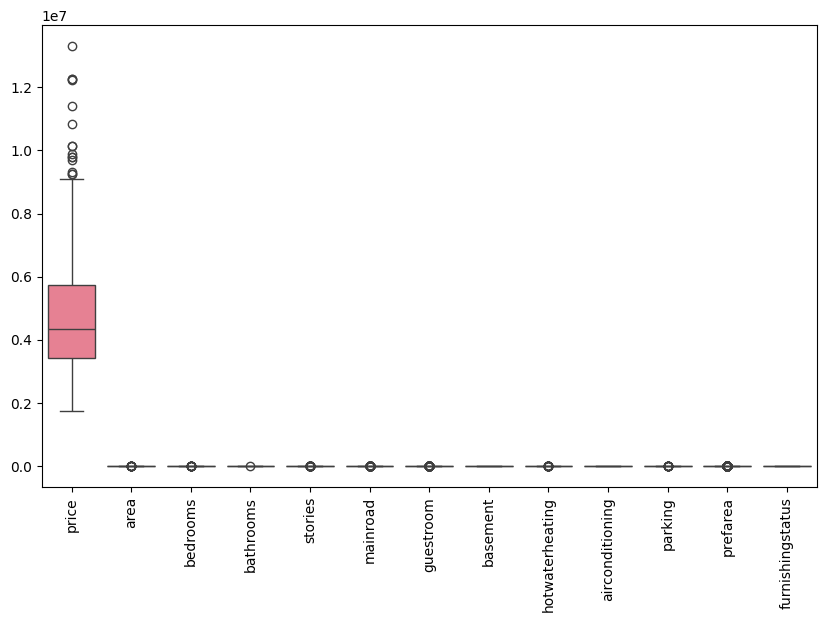

In [ ]:
# prompt: create boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

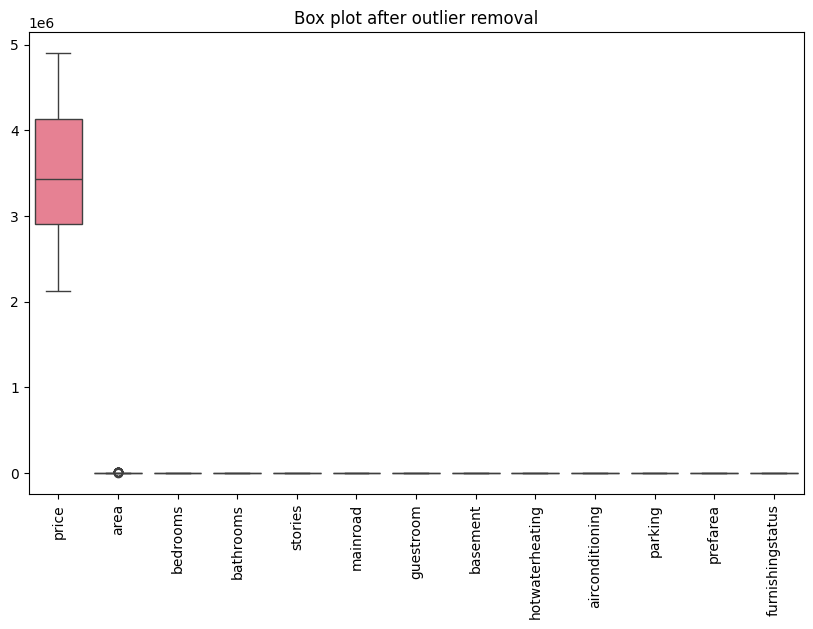

In [ ]:
# prompt: remove outliers and create box plot

import matplotlib.pyplot as plt
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for 'price' column
data_no_outliers = remove_outliers(data, 'price')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)
plt.xticks(rotation=90)
plt.title('Box plot after outlier removal')
plt.show()

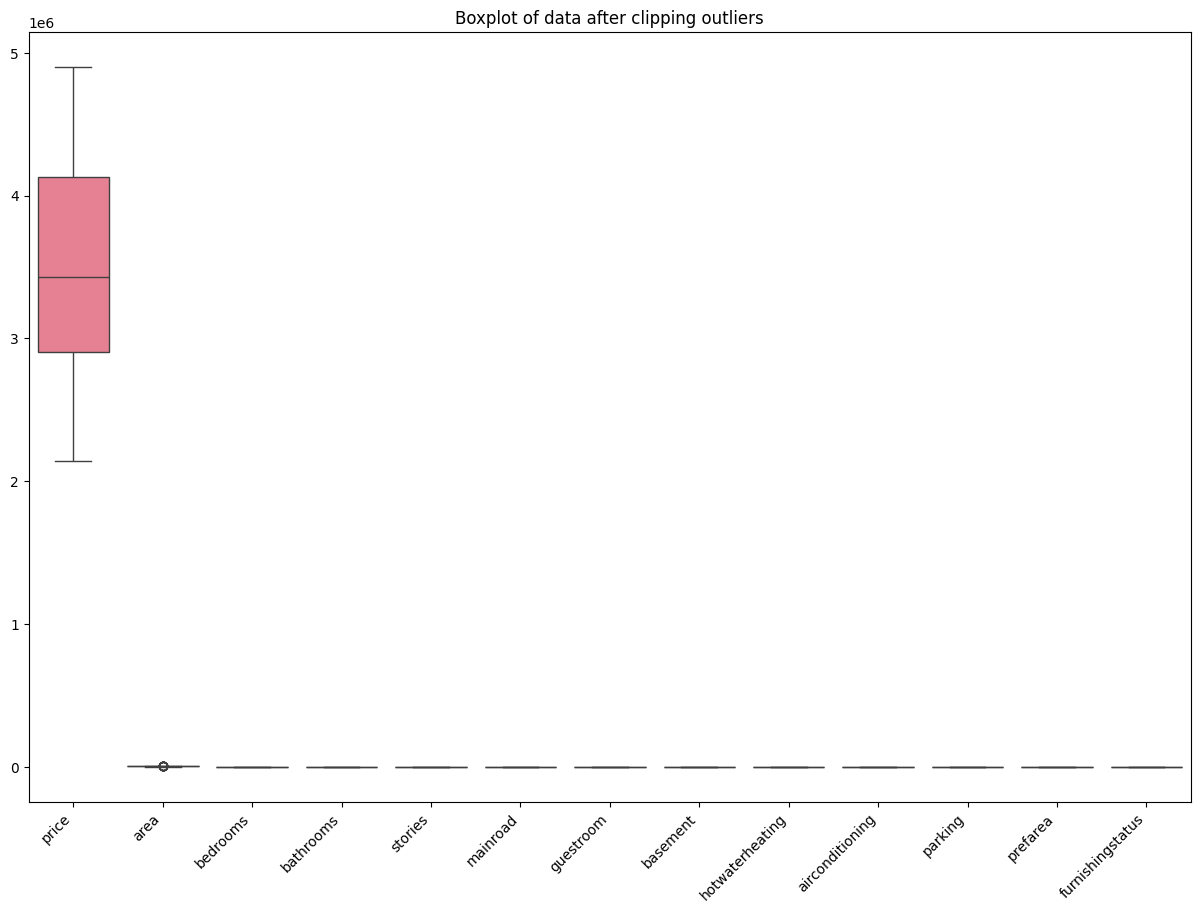

In [ ]:
def clip_outliers(data, columns):
    for column in columns:
        lower_clip = data[column].quantile(0.05)
        upper_clip = data[column].quantile(0.95)
        data[column] = np.clip(data[column], lower_clip, upper_clip)
    return data

# Example usage
columns_to_clip = ['price', 'bedrooms', 'bathrooms', 'area', 'stories', 'mainroad', 'guestroom', 'hotwaterheating', 'parking', 'prefarea']
data = clip_outliers(data, columns_to_clip)

# Visualize the data after clipping (optional)
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of data after clipping outliers')
plt.show()

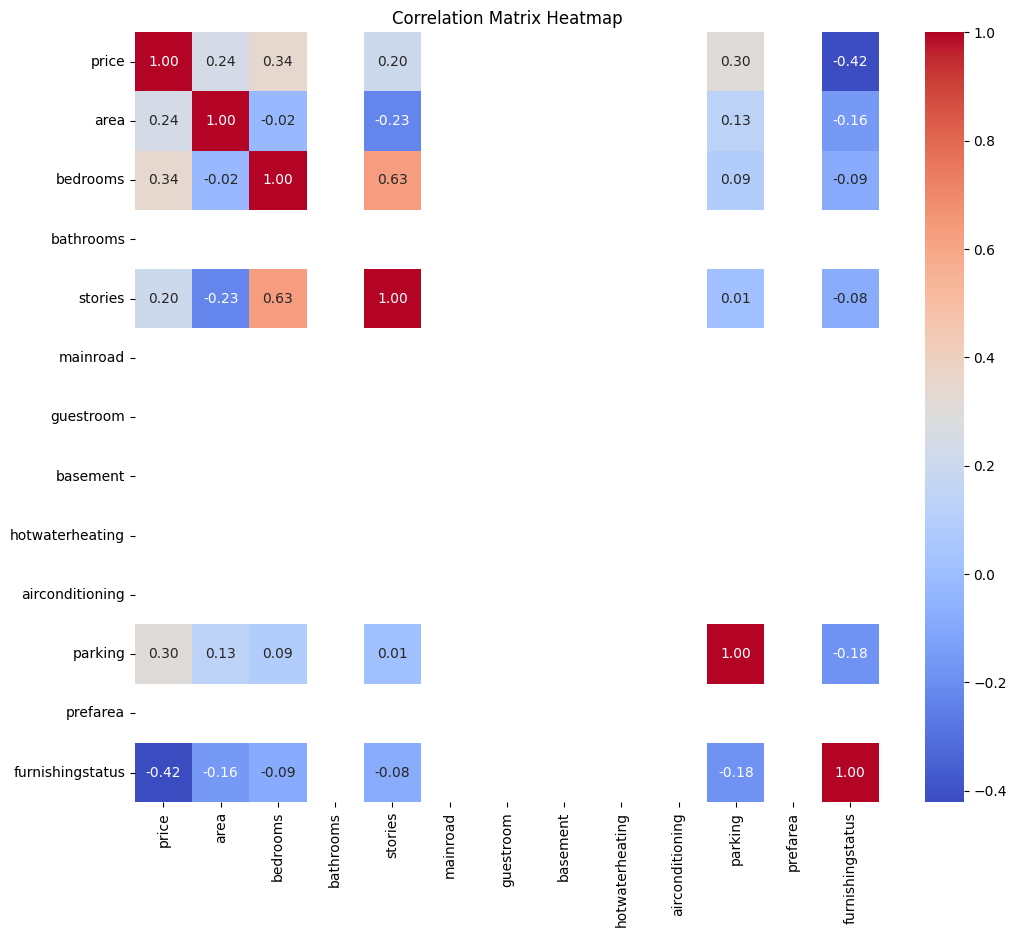

In [ ]:
# prompt: draw heatmap to calculate correlation matrix

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# prompt: define x and y for linear regression

x = data[['area']]
y = data['price']

In [ ]:
x

,area
27,8090.5
108,3240.0
137,4640.0
158,7980.0
199,4200.0
...,...
535,3360.0
537,2975.7
538,3649.0
542,3620.0


In [ ]:
y

,price
27,4900000
108,4900000
137,4900000
158,4900000
199,4900000
...,...
535,2139900
537,2139900
538,2139900
542,2139900


In [ ]:
# prompt: extract multiple linear regression model on x and y, give ols regression result

import statsmodels.api as sm

# Add a constant to the independent variable(s)
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     7.711
Date:                Thu, 13 Mar 2025   Prob (F-statistic):            0.00636
Time:                        05:48:22   Log-Likelihood:                -1838.2
No. Observations:                 123   AIC:                             3680.
Df Residuals:                     121   BIC:                             3686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.894e+06   2.21e+05     13.085      0.0

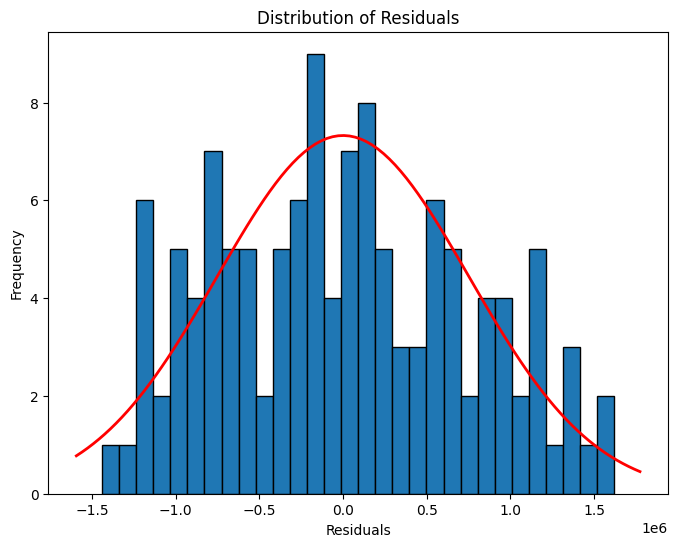

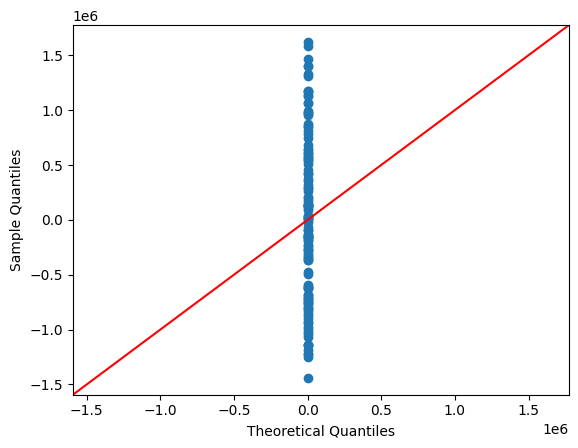

In [ ]:
# prompt: check if residual are distributed normally for statsmodule , histogram with line

# Calculate residuals
residuals = model.resid

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Add a normal distribution curve to the histogram
from scipy.stats import norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p * len(residuals) * (xmax - xmin) / 30, 'r', linewidth=2) # Scale to match histogram

plt.show()

# Check for normality using a Q-Q plot
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='45')
plt.show()

In [ ]:
# Extract the residuals and fitted values
from statsmodels.stats.diagnostic import het_white
residuals = model.resid
fitted_values = model.fittedvalues

# Perform the White test
white_test = het_white(residuals, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))


# Interpret the results
lm_stat, lm_p_value, f_stat, f_p_value = white_test
alpha = 0.05  # significance level

print("\nWhite Test Results:")
print(f"LM Statistic: {lm_stat:.3f}")
print(f"p-value (LM test): {lm_p_value:.3f}")

if lm_p_value < alpha:
  print("Reject the null hypothesis: Heteroscedasticity is present.")
else:
  print("Fail to reject the null hypothesis: Homoscedasticity is assumed.")

{'LM Statistic': 2.1052629924303394, 'LM-Test p-value': 0.3490180998063535, 'F-Statistic': 1.0448410135332127, 'F-Test p-value': 0.35492533738008847}

White Test Results:
LM Statistic: 2.105
p-value (LM test): 0.349
Fail to reject the null hypothesis: Homoscedasticity is assumed.
